In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import unicodedata
import scipy.stats as stat

In [2]:
def Freq(FrequentieLijst):
    opl = []
    for i in range(len(FrequentieLijst)):
        opl.append(1/FrequentieLijst[i])
    return(opl)

def Fase(FrequentieLijst, R, C, L):
    fasehoeken = []
    for f in FrequentieLijst:
        x = 1 - (L*C)*f**2
        y = R * C * f
        #if x > 0:
        #    phi = np.pi/2 - np.arctan(y/x) + np.pi/2#*180/np.pi
        #if x < 0:
        #    phi = np.pi/2 - (np.arctan(y/x)+np.pi) + np.pi/2#*180/np.pi
        #if x == 0:
        #    phi = 0 + np.pi/2
        phi = np.pi/2 + np.arctan(x/y)#*180/np.pi
        fasehoeken.append(phi)
    return fasehoeken

def DFase(f, L, C, R, sF):
    w = Hoekf(f)
    sW = Hoekf(sF)
    Dw_Teller = -R*C*(L*C*w**2+1)
    Dw_Noemer = (L*C*w**2)**2 + ((R*C)**2 - 2*L*C)*w**2 + 1
    Dw = Dw_Teller/Dw_Noemer
    
    DL_Teller = -w
    DL_Noemer = R*( (1-L*C*w**2)**2/(R*C*w)**2 + 1 )
    DL = DL_Teller/DL_Noemer
    
    DC_Teller = -R*w
    DC_Noemer = ( (L*w**2)**2 + (R*w)**2 )*C**2 - 2*L*C*w**2 + 1
    DC = DC_Teller/DC_Noemer
    
    DR_Teller = -(1-L*C*w**2)
    DR_Noemer = ( (1-L*C*w**2)**2/(R*C*w)**2 + 1 )*R**2*C*w
    DR = DR_Teller/DR_Noemer
    
    s2 = (Dw * sW)**2 + (DL * 0.05*L)**2 + (DC * 0.05*C)**2 + (DR * 0.05*R)**2
    return(np.sqrt(s2))

def Hoekf(f):
    return(2*np.pi*f)


def HoekFreq(FrequentieLijst):
    result = []
    for f in FrequentieLijst:
        result.append(Hoekf(f))
    return(result)

def Dfn(L, C):
    DL_Teller = -C
    DL_Noemer = 4*np.pi * (L*C)**1.5
    DL = DL_Teller/DL_Noemer
    
    DC_Teller = -L
    DC_Noemer = 4*np.pi * (L*C)**1.5
    DC = DC_Teller/DC_Noemer
    
    s2 = (DL * 0.05*L)**2 + (DC * 0.05*C)**2
    return(np.sqrt(s2))



In [3]:
T_13 = [3.8 * 10 * 10**-6, 5 * 10 * 10**-6, 2.1 * 25 * 10**-6, 4.6 * 25 * 10**-6, 3.8 * 500 * 10**-6, 4 * 5 * 10**-6,
          3.4 * 5 * 10**-6, 2.8 * 5 * 10**-6, 2.2 * 5 * 10**-6, 1.8 * 5 * 10**-6]
Freq_13 = Freq(T_13)
#Output_13 = [8 * 5, 17 * 2, 13 * 2, 2 * 2, 2 * 2, 3.6 * 500 * 10**-3, 2.4 * 500 * 10**-3, 3.8 * 200 * 10**-3, 
#          3.8 * 100 * 10**-3, 2.8 * 100 * 10 **-3]

#Output_13 = [0.2 * 8 * 5, 0.2 *  17 * 2,0.2 *  13 * 2, 2 * 2, 2 * 2, 3.6 * 500 * 10**-3, 2.4 * 500 * 10**-3, 3.8 * 200 * 10**-3, 
#          3.8 * 100 * 10**-3, 2.8 * 100 * 10 **-3]

Output_13 = [3.2 * 5, 4.2 * 2 ,3.4 * 2, 2 * 2, 2 * 2, 3.6 * 500 * 10**-3, 2.4 * 500 * 10**-3, 3.8 * 200 * 10**-3, 
          3.8 * 100 * 10**-3, 2.8 * 100 * 10 **-3]

Fase_13 = Fase(HoekFreq(Freq_13), 100, 15*10**-9, 2.2*10**-3)
ST_13 = [10*0.2*10**-6, 10*0.2*10**-6, 25*0.2*10**-6, 25*0.2*10**-6, 500*0.2*10**-6, 5*0.2*10**-6, 5*0.2*10**-6
         , 5*0.2*10**-6, 5*0.2*10**-6, 5*0.2*10**-6 ]
SF_13 = []
for i in range(len(T_13)):
    SF_13.append(ST_13[i]/T_13[i]**2)
SO_13 = [0.2*5, 0.2*2, 0.2*2, 0.2*2, 0.2*2, 0.2*500*10**-3, 0.2*500*10**-3, 0.2*200*10**-3, 0.2*100*10**-3, 
         0.2*100*10**-3]
SPhi_13 = []
for i in range(len(T_13)):
    SPhi_13.append(DFase(Freq_13[i], 2.2*10**-3, 15*10**-9, 100, SF_13[i]))
print(T_13)

[3.7999999999999995e-05, 4.9999999999999996e-05, 5.2499999999999995e-05, 0.00011499999999999998, 0.0019, 1.9999999999999998e-05, 1.7e-05, 1.4e-05, 1.1e-05, 9e-06]


In [4]:
for i in range(len(Freq_13)):
    print(str(round(T_13[i], 7))+"+-"+str(round(ST_13[i], 10))+" | "+str(round(Freq_13[i],0))+"+-"+str(round(SF_13[i],0))+" | "+str(Output_13[i])+"+-"+str(SO_13[i])+" | "+str(round(Fase_13[i], 3))+"+-"+str(round(SPhi_13[i], 4)))

3.8e-05+-2e-06 | 26316.0+-1385.0 | 16.0+-1.0 | 1.946+-0.4214
5e-05+-2e-06 | 20000.0+-800.0 | 8.4+-0.4 | 2.767+-0.0614
5.25e-05+-5e-06 | 19048.0+-1814.0 | 6.8+-0.4 | 2.813+-0.0885
0.000115+-5e-06 | 8696.0+-378.0 | 4+-0.4 | 3.051+-0.0083
0.0019+-0.0001 | 526.0+-28.0 | 4+-0.4 | 3.137+-0.0004
2e-05+-1e-06 | 50000.0+-2500.0 | 1.8+-0.1 | 0.206+-0.0262
1.7e-05+-1e-06 | 58824.0+-3460.0 | 1.2+-0.1 | 0.157+-0.0191
1.4e-05+-1e-06 | 71429.0+-5102.0 | 0.76+-0.04 | 0.119+-0.0146
1.1e-05+-1e-06 | 90909.0+-8264.0 | 0.38+-0.02 | 0.088+-0.0115
9e-06+-1e-06 | 111111.0+-12346.0 | 0.28+-0.02 | 0.069+-0.0101


In [5]:
def Amplitude(f, A, e, w):
    teller = A
    noemer = np.sqrt((2*e)**2*(f/w)**2+(1-(f/w)**2)**2)
    return(teller/noemer)

def Amp(f, A, e, w):
    opl = []
    for i in f:
        opl.append(Amplitude(i, A, e, w))
    return (opl)

def FasE(f, e, w):
    teller = 2 * e * f
    noemer = w * (1 - (f / w)**2)
    oplossing = -np.arctan(teller/noemer)#*180/np.pi
    return(oplossing)

def FaseHoek(f,e,w):
    opl = []
    for i in f:
        o = FasE(i, e, w)
        if o <= 0:
            o = o + np.pi
        opl.append(o)
    return(opl)

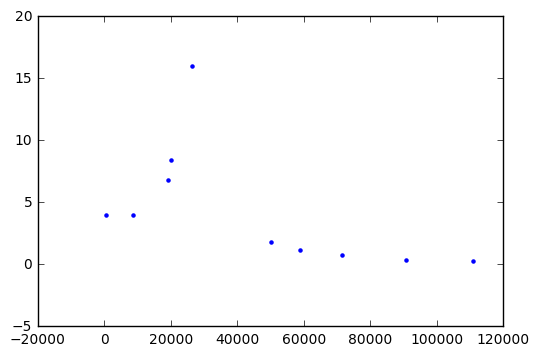

In [6]:
fig = plt.figure()
plt.scatter(Freq_13, Output_13, color = 'blue', marker = '.')
#plt.axis([0, 0.002, 0, 40])
plt.show()

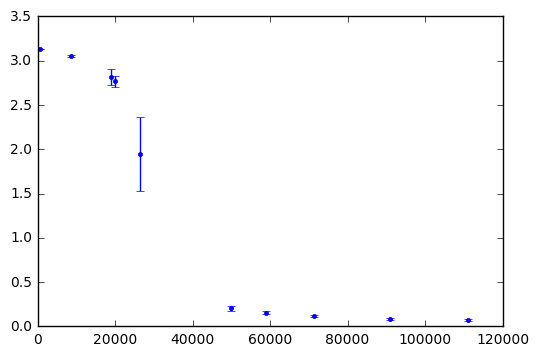

In [7]:
f_13 = np.linspace(0, max(Freq_13), 200)

fig = plt.figure()
#plt.scatter(Freq_13, Fase_13, color = 'blue', marker = '.')
plt.errorbar(Freq_13, Fase_13, SPhi_13, fmt = '.')

#plt.plot(f_13, FaseHoek(HoekFreq(f_13), e, w))
#plt.axis([0, 0.002, 0, 3*10**-9])
plt.show()

In [8]:
HoekFreq_13 = HoekFreq(Freq_13)

In [9]:
B = 1 / (3.8 * 10 * 10**-6)
print(B)
x0 = [ 0.01, 20000]
def chi2(x,y,param,s):
    diff = np.array(y) - np.array(Amp(x, 4, param[0],param[1]))
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(Freq_13, Output_13, param, SO_13)

result = opt.minimize(chi2ftie,x0)
e13, w13= result.x
print(e13, w13)

26315.789473684214
0.11783180704601595 27870.96588161226


In [10]:
Fe = lambda X: chi2(Freq_13, Output_13, [X, w13], SO_13) - chi2(Freq_13, Output_13, [e13, w13], SO_13) - 1
#print(Fe(0.127017))
e1 = opt.fsolve(Fe,0.109)[0]
e2 = opt.fsolve(Fe,0.12)[0]
#print(e13 - 0.109502, 0.127017 - e13)
print(e1,e13 ,e2)
sE1 = e13 - e1
sE2 = e2 - e13
print("Fout op e",sE1,sE2)
print("------")
Fw = lambda X: chi2(Freq_13, Output_13, [e13, X], SO_13) - chi2(Freq_13, Output_13, [e13, w13], SO_13) - 1
#print(Fw(28133.1421))
w1 = opt.fsolve(Fw,0.1)[0]
w2 = opt.fsolve(Fw,0.5)[0]
#print(w13 - 27603.776, 28133.1421 - w13)
print(w1,w13 ,w2)
sW1 = w13 - w1
sW2 = w2 - w13
print("Fout op w",sW1,sW2)

203.06369045894644 0.11783180704601595 202.8962515847221
Fout op e -202.94585865190044 202.7784197776761
------
166.58792319377383 27870.96588161226 166.00778637506775
Fout op w 27704.37795841849 -27704.958095237194


/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


9.260218057820223 -0.999999126880871
0.1307694599260092


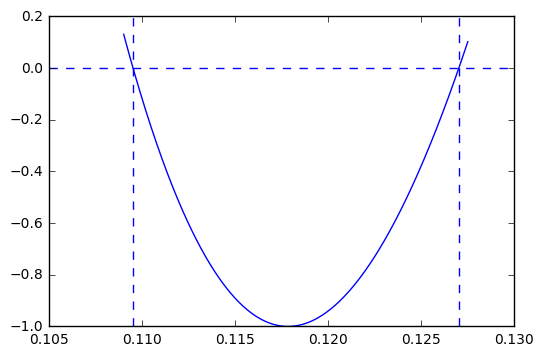

In [11]:
Fig = plt.figure()
Ax = np.linspace(0.109,0.1275, 500)
cita = chi2(Freq_13, Output_13, [e13, w13], SO_13)
chikwadraat = lambda X: chi2(Freq_13, Output_13, [X, w13], SO_13) - chi2(Freq_13, Output_13, [e13, w13], SO_13) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(0.109502, linestyle = '--')
plt.axvline(0.127017, linestyle = '--')
plt.show()

9.260218057820223 -0.9999996752857463
0.1339519524535504


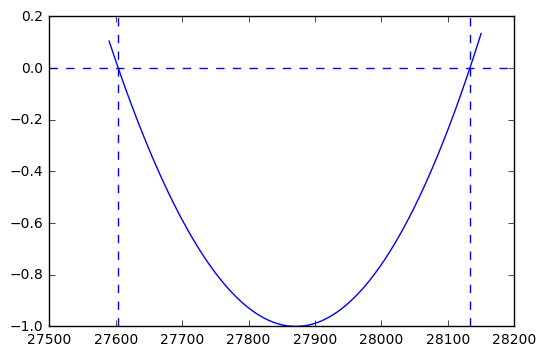

In [12]:
Fig = plt.figure()
Ax = np.linspace(27590,28150, 1000)
cita = chi2(Freq_13, Output_13, [e13, w13], SO_13)
chikwadraat = lambda X: chi2(Freq_13, Output_13, [e13, X], SO_13) - chi2(Freq_13, Output_13, [e13, w13], SO_13) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(27603.776, linestyle = '--')
plt.axvline(28133.1421, linestyle = '--')
plt.show()

In [13]:
def ergo(f, L, C, R):
    w = HoekFreq(f)
    opl = []
    for i in w:
        opl.append(bergo(i, L, C, R))
    return(opl)

def bergo(w, L, C, R):
    noemer = ( (1-L*C*w**2)**2 + (R*C*w)**2 )**0.5
    return(4/noemer)

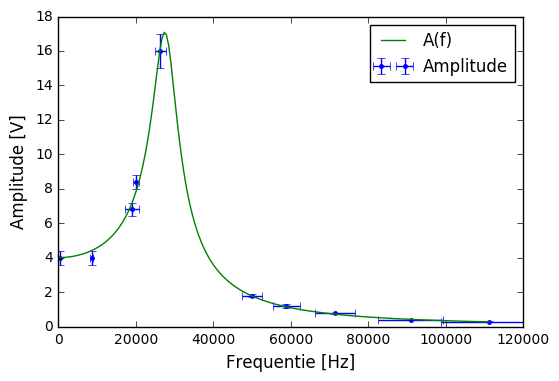

In [14]:

fig = plt.figure()
plt.errorbar(Freq_13, Output_13, SO_13, SF_13, fmt = '.', label = 'Amplitude')
plt.plot(f_13, Amplitude(f_13, 4, e13, w13), label = "A(f)")
#plt.plot(f_13, ergo(f_13, 2.2*10**-3, 15*10**-9, 100))
#plt.plot(f_13, Amplitude(f_13, 4, 0.13, B ))

#plt.axvline( (2*np.pi*np.sqrt(2.2*10**-3*15*10**-9))**-1 , color = 'purple')
#plt.axvline( w )
#plt.plot(f_13, Amplitude(HoekFreq(f_13), 4, 0.13, 1/(np.sqrt(2.2*10**-3 * 15*10**-9))), label = "A(f)")
#plt.axis([0, 120000, 0, 100])
plt.xlabel("Frequentie [Hz]", fontsize = 12)
plt.ylabel("Amplitude [V]", fontsize = 12)
plt.axis([0, 120000, 0, 18])
plt.legend()
#fig.savefig('Opgave3-0.13-Amplitude_Plot.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [15]:
v = len(Freq_13) - len([e13, w13])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([4,e13,w13]), v)
print(str(pwaarde*100)+"%")

0.0%


In [16]:
B = 1 / (3.8 * 10 * 10**-6)
print(B)
print((2*np.pi*np.sqrt(2.2*10**-3*15*10**-9))**-1)
x0 = [ 0.13, B]
def chi2(x,y,param,s):
    diff = np.array(y) - np.array(FaseHoek(x, param[0],param[1]))
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(Freq_13, Fase_13, param, SPhi_13)

result = opt.minimize(chi2ftie,x0)
e13p, w13p= result.x
print(e13p, w13p)

26315.789473684214
27705.319427199625
0.1305582343918971 27705.319428185234


In [17]:
Fe = lambda X: chi2(Freq_13, Fase_13, [X, w13p], SPhi_13) - chi2(Freq_13, Fase_13, [e13p, w13p], SPhi_13) - 1
#print(Fe(0.1341597))
e1 = opt.fsolve(Fe,0.125)[0]
e2 = opt.fsolve(Fe,0.14)[0]
#print(e13p - 0.1269617, 0.1341597 - e13p)
print(e1,e13p ,e2)
sE1 = e13p - e1
sE2 = e2 - e13p
print("Fout op e",sE1,sE2)
print("------")
Fw = lambda X: chi2(Freq_13, Fase_13, [e13p, X], SPhi_13) - chi2(Freq_13, Fase_13, [e13p, w13p], SPhi_13) - 1
#print(Fw(28149.95))
w1 = opt.fsolve(Fw,27200)[0]
w2 = opt.fsolve(Fw,28200)[0]
#print(w13p - 27279.4, 28149.95 - w13p)
print(w1,w13p ,w2)
sW1 = w13p - w1
sW2 = w2 - w13p
print("Fout op w",sW1,sW2)

20.32522301605252 0.1305582343918971 20.230414583716115
Fout op e -20.19466478166062 20.099856349324217
------
942596.2343933701 27705.319428185234 944156.8315296214
Fout op w -914890.9149651849 916451.5121014362


/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1.9639853737075494e-12 -0.9999982551439285
0.059384945144820955


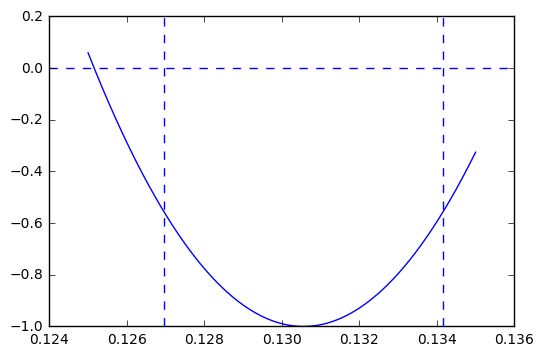

In [18]:
Fig = plt.figure()
Ax = np.linspace(0.125,0.135, 500)
cita = chi2(Freq_13, Fase_13, [e13p, w13p], SPhi_13)
chikwadraat = lambda X: chi2(Freq_13, Fase_13, [X, w13p], SPhi_13) - chi2(Freq_13, Fase_13, [e13p, w13p], SPhi_13) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(0.1269617, linestyle = '--')
plt.axvline(0.1341597, linestyle = '--')
plt.show()

1.9639853737075494e-12 -0.999999802017369
-0.447141659731468


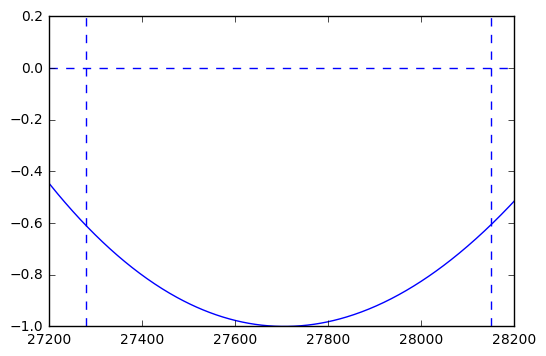

In [19]:
Fig = plt.figure()
Ax = np.linspace(27200,28200, 500)
cita = chi2(Freq_13, Fase_13, [e13p, w13p], SPhi_13)
chikwadraat = lambda X: chi2(Freq_13, Fase_13, [e13p, X], SPhi_13) - chi2(Freq_13, Fase_13, [e13p, w13p], SPhi_13) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(27279.4, linestyle = '--')
plt.axvline(28149.95, linestyle = '--')
plt.show()

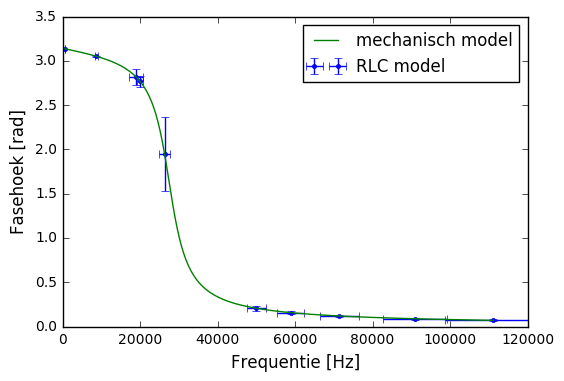

In [20]:
fig = plt.figure()
plt.errorbar(Freq_13, Fase_13, SPhi_13, SF_13, fmt = '.', label = 'RLC model')
plt.plot(f_13, FaseHoek(f_13, e13p, w13p), label = 'mechanisch model')
#plt.plot(f_13, FaseHoek(f_13, 0.07, B))
#plt.plot(f_13, FaseHoek(f_13, 0.13, B))
#plt.axvline(B, color = 'r', linestyle = '--')
##plt.axhline(np.pi/2, linestyle = '--')
##plt.axvline(w, color = 'r', linestyle = '--')
#plt.plot(f_13, Amplitude(f_13, 4, 0.07, B ))
#plt.plot(f_13, Amplitude(HoekFreq(f_13), 4, 0.07, 1/(np.sqrt(2.2*10**-3 * 15*10**-9)) ))
plt.axis([0, 120000, 0, 3.5])
plt.legend()
plt.xlabel("Frequentie [Hz]", fontsize = 12)
plt.ylabel("Fasehoek [rad]", fontsize = 12)
#fig.savefig('Opgave3-0.13-Fasehoek-Plot.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [21]:
v = len(Freq_13) - len([e13p, w13p])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([e13p,w13p]), v)
print(str(pwaarde*100)+"%")

100.0%


In [22]:
Freq_6 = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 110000]
SF_6 = [0.1*10000, 0.1*10000, 0.1*1000, 0.1*1000, 0.1*1000, 0.1*1000, 0.1*1000, 0.1*1000, 0.1*1000, 0.1*1000, 0.1*1000]
Output_6 = [4, 4, 6, 7.2, 17, 18, 5.6, 4, 2.6, 2, 1.5]
SO_6 = [0.2*2, 0.2*2, 0.2*2, 0.2*5, 0.2*5, 0.2*5, 0.2*2, 0.2*2, 0.2, 0.2, 0.2*0.5]
Fase_6 = Fase(HoekFreq(Freq_6), 100, 3.3*10**-9, 2.2*10**-3)
SPhi_6 = []
for i in range(len(Freq_6)):
    SPhi_6.append(DFase(Freq_6[i], 2.2*10**-3, 3.3*10**-9, 100, SF_6[i]))

In [23]:
for i in range(len(Freq_6)):
    print(str(Freq_6[i])+"+-"+str(SF_6[i])+" | "+str(Output_6[i])+"+-"+str(SO_6[i])+" | "+str(round(Fase_6[i], 5))+"+-"+str(round(SPhi_6[i], 5)))

10000+-1000.0 | 4+-0.4 | 3.12025+-0.00273
20000+-1000.0 | 4+-0.4 | 3.09479+-0.0046
30000+-100.0 | 6+-0.4 | 3.05796+-0.00715
40000+-100.0 | 7.2+-1.0 | 2.98959+-0.01698
50000+-100.0 | 17+-1.0 | 2.79097+-0.07194
60000+-100.0 | 18+-1.0 | 1.32048+-0.54279
70000+-100.0 | 5.6+-0.4 | 0.34458+-0.06967
80000+-100.0 | 4+-0.4 | 0.19626+-0.0258
90000+-100.0 | 2.6+-0.2 | 0.14028+-0.01495
100000+-100.0 | 2+-0.2 | 0.11066+-0.01048
110000+-100.0 | 1.5+-0.1 | 0.09215+-0.00812


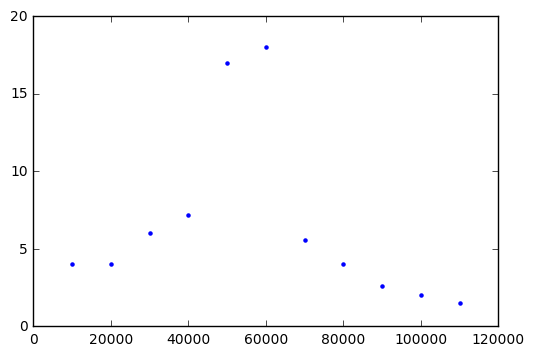

In [24]:
fig = plt.figure()
plt.scatter(Freq_6, Output_6, color = 'blue', marker = '.')
#plt.axis([0, 0.002, 0, 40])
plt.show()

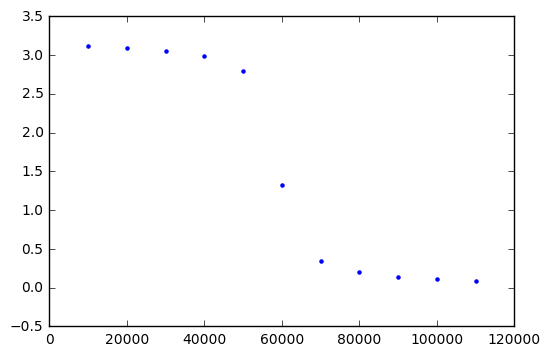

In [25]:
fig = plt.figure()
plt.scatter(Freq_6, Fase_6, color = 'blue', marker = '.')
#plt.errorbar(Freq_13, Fase_13, SPhi_13, fmt = '.')
#plt.axis([0, 0.002, 0, 3*10**-9])
plt.show()

In [26]:
x0 = [ 0.06, 59000]
def chi2(x,y,param,s):
    diff = np.array(y) - np.array(Amp(x, 4, param[0],param[1]))
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(Freq_6, Output_6, param, SO_6)

result = opt.minimize(chi2ftie,x0)
e6, w6= result.x
print(e6, w6)

v = len(Freq_6) - len([e6, w6])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([4,e6,w6]), v)
print(str(pwaarde*100)+"%")

0.07399698175803772 55669.81009253547
0.0%


In [27]:
Fe = lambda X: chi2(Freq_6, Output_6, [X, w6], SO_6) - chi2(Freq_6, Output_6, [e6, w6], SO_6) - 1
#print(Fe(0.08135945))
e1 = opt.fsolve(Fe,0.065)[0]
e2 = opt.fsolve(Fe,0.085)[0]
#print(e6 - 0.0668575, 0.08135945 - e6)
print(e1,e6 ,e2)
sE1 = e6 - e1
sE2 = e2 - e6
print("Fout op e",sE1,sE2)
print("------")
Fw = lambda X: chi2(Freq_6, Output_6, [e6, X], SO_6) - chi2(Freq_6, Output_6, [e6, w6], SO_6) - 1
#print(Fw(55947.48))
w1 = opt.fsolve(Fw,55300)[0]
w2 = opt.fsolve(Fw,56000)[0]
#print(w6 - 55388.33, 55947.48 - w6)
print(w1,w6 ,w2)
sW1 = w6 - w1
sW2 = w2 - w6
print("Fout op w",sW1,sW2)

0.8552388461674229 0.07399698175803772 0.8575309467038623
Fout op e -0.7812418644093851 0.7835339649458246
------
-6531.343477447907 55669.81009253547 54929.77283630045
Fout op w 62201.15356998338 -740.0372562350167


/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


13.886571464619943 -0.9999930881038264
1.1918876625877122


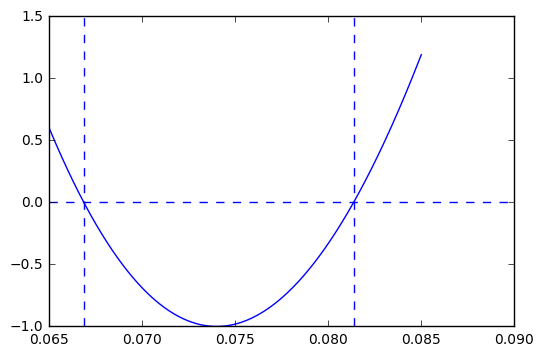

In [28]:
Fig = plt.figure()
Ax = np.linspace(0.065,0.085, 500)
cita = chi2(Freq_6, Output_6, [e6, w6], SO_6)
chikwadraat = lambda X: chi2(Freq_6, Output_6, [X, w6], SO_6) - chi2(Freq_6, Output_6, [e6, w6], SO_6) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(0.0668575, linestyle = '--')
plt.axvline(0.08135945, linestyle = '--')
plt.show()

13.886571464619943 -0.9999996689428841
0.7188528783747152


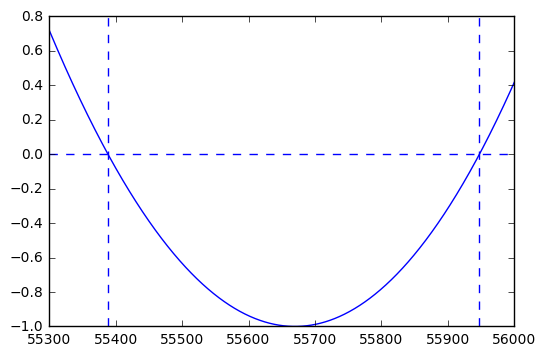

In [29]:
Fig = plt.figure()
Ax = np.linspace(55300,56000, 1000)
cita = chi2(Freq_6, Output_6, [e6, w6], SO_6)
chikwadraat = lambda X: chi2(Freq_6, Output_6, [e6, X], SO_6) - chi2(Freq_6, Output_6, [e6, w6], SO_6) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(55388.33, linestyle = '--')
plt.axvline(55947.48, linestyle = '--')
plt.show()

In [30]:
DF = Dfn(2.2*10**-3, 3.3*10**-9)

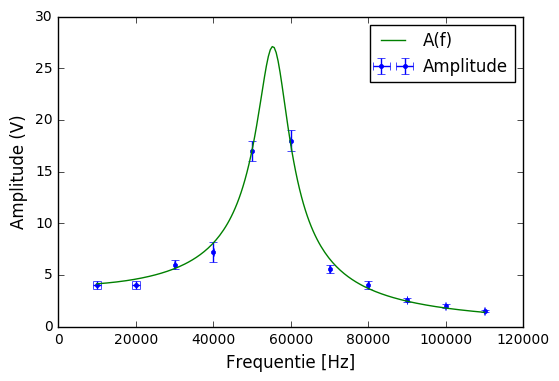

In [31]:
f_6 = np.linspace(min(Freq_6), max(Freq_6), 200)
fig = plt.figure()
plt.errorbar(Freq_6, Output_6, yerr = SO_6, xerr = SF_6, fmt = '.', label = 'Amplitude')
plt.plot(f_6, Amplitude(f_6, 4, e6, w6), label = 'A(f)')
plt.xlabel("Frequentie [Hz]", fontsize = 12)
plt.ylabel("Amplitude (V)", fontsize = 12)
plt.legend()
#fig.savefig('Opgave3-0.06-Amplitude_Plot.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [32]:
x0 = [ 0.06, 59000]
def chi2(x,y,param,s):
    diff = np.array(y) - np.array(FaseHoek(x, param[0],param[1]))
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(Freq_6, Fase_6, param, SPhi_6)

result = opt.minimize(chi2ftie,x0)
e6p, w6p= result.x
print(e6p, w6p)

v = len(Freq_6) - len([e6p, w6p])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([e6p,w6p]), v)
print(str(pwaarde*100)+"%")

0.061237236667285415 59067.93967713133
100.0%


In [33]:
Fe = lambda X: chi2(Freq_6, Fase_6, [X, w6p], SPhi_6) - chi2(Freq_6, Fase_6, [e6p, w6p], SPhi_6) - 1
#print(Fe(0.063409))
e1 = opt.fsolve(Fe,0.0585)[0]
e2 = opt.fsolve(Fe,0.064)[0]
#print(e6p - 0.0590685, 0.063409 - e6p)
print(e1,e6p ,e2)
sE1 = e6p - e1
sE2 = e2 - e6p
print("Fout op e",sE1,sE2)
print("------")
Fw = lambda X: chi2(Freq_6, Fase_6, [e6p, X], SPhi_6) - chi2(Freq_6, Fase_6, [e6p, w6p], SPhi_6) - 1
#print(Fw(59856.809))
w1 = opt.fsolve(Fw,58000)[0]
w2 = opt.fsolve(Fw,60000)[0]
#print(w6p - 58268.56, 59856.809 - w6p)
print(w1,w6p ,w2)
sW1 = w6p - w1
sW2 = w2 - w6p
print("Fout op w",sW1,sW2)

3.1766027587701697 0.061237236667285415 3.1643250181457057
Fout op e -3.115365522102884 3.10308778147842
------
121251.69172008956 59067.93967713133 121304.71949941597
Fout op w -62183.75204295822 62236.77982228463


/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


1.0002056863196404e-11 -0.9999969705047103
0.6186712454914338


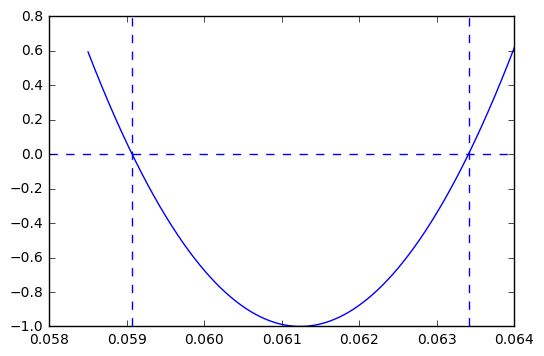

In [34]:
Fig = plt.figure()
Ax = np.linspace(0.0585,0.064, 500)
cita = chi2(Freq_6, Fase_6, [e6p, w6p], SPhi_6)
chikwadraat = lambda X: chi2(Freq_6, Fase_6, [X, w6p], SPhi_6) - chi2(Freq_6, Fase_6, [e6p, w6p], SPhi_6) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(0.0590685, linestyle = '--')
plt.axvline(0.063409, linestyle = '--')
plt.show()

1.0002056863196404e-11 -0.9999987947014071
0.7815365347620138


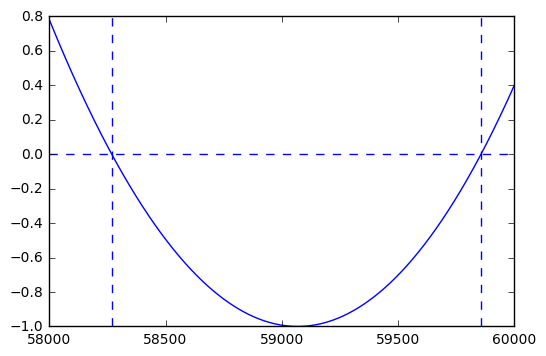

In [35]:
Fig = plt.figure()
Ax = np.linspace(58000,60000, 1000)
cita = chi2(Freq_6, Fase_6, [e6p, w6p], SPhi_6)
chikwadraat = lambda X: chi2(Freq_6, Fase_6, [e6p, X], SPhi_6) - chi2(Freq_6, Fase_6, [e6p, w6p], SPhi_6) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(58268.56, linestyle = '--')
plt.axvline(59856.809, linestyle = '--')
plt.show()

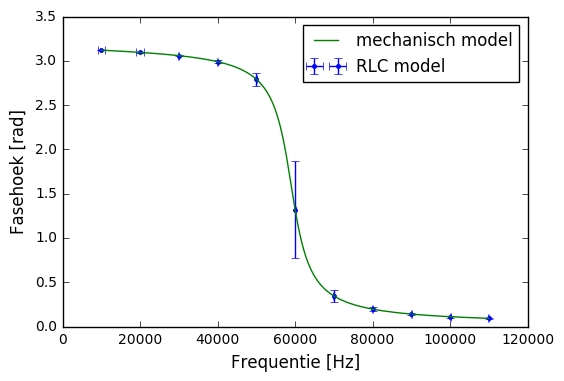

In [36]:
fig = plt.figure()
plt.errorbar(Freq_6, Fase_6, SPhi_6, SF_6, fmt = '.', label = 'RLC model')
plt.plot(f_6, FaseHoek(f_6, e6p, w6p), label = 'mechanisch model')
plt.xlabel("Frequentie [Hz]", fontsize = 12)
plt.ylabel("Fasehoek [rad]", fontsize = 12)
plt.legend()
#fig.savefig('Opgave3-0.06-Fasehoek_Plot.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [37]:
Freq_61 = Freq_6
SF_61 = SF_6
Output_61 = [3.8, 3.8, 3.8, 3.6, 3.2, 3, 2.4, 1.9, 1.6, 1.3, 1.1]
SO_61 = [0.2 * 1, 0.2 * 1, 0.2 * 1, 0.2 * 1, 0.2 * 1, 0.2 * 1, 0.2 * 1, 0.2 * 0.5, 0.2 * 0.5, 0.2 * 0.5, 0.2 * 0.5]
Fase_61 = Fase(HoekFreq(Freq_61), 1000, 3.3*10**-9, 2.2*10**-3)
SPhi_61 = []
for i in range(len(Freq_61)):
    SPhi_61.append(DFase(Freq_61[i], 2.2*10**-3, 3.3*10**-9, 1000, SF_61[i]))

In [38]:
for i in range(len(Freq_61)):
    print(str(Freq_61[i])+"+-"+str(SF_61[i])+" | "+str(Output_61[i])+"+-"+str(SO_61[i])+" | "+str(round(Fase_61[i], 2))+"+-"+str(round(SPhi_61[i], 2)))

10000+-1000.0 | 3.8+-0.2 | 2.93+-0.03
20000+-1000.0 | 3.8+-0.2 | 2.7+-0.04
30000+-100.0 | 3.8+-0.2 | 2.44+-0.04
40000+-100.0 | 3.6+-0.2 | 2.15+-0.05
50000+-100.0 | 3.2+-0.2 | 1.84+-0.06
60000+-100.0 | 3+-0.2 | 1.55+-0.06
70000+-100.0 | 2.4+-0.2 | 1.3+-0.06
80000+-100.0 | 1.9+-0.1 | 1.1+-0.05
90000+-100.0 | 1.6+-0.1 | 0.95+-0.05
100000+-100.0 | 1.3+-0.1 | 0.84+-0.05
110000+-100.0 | 1.1+-0.1 | 0.75+-0.04


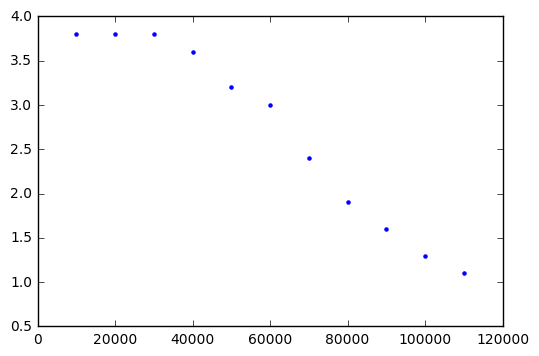

In [39]:
fig = plt.figure()
plt.scatter(Freq_61, Output_61, color = 'blue', marker = '.')
#plt.axis([0, 0.002, 0, 40])
plt.show()

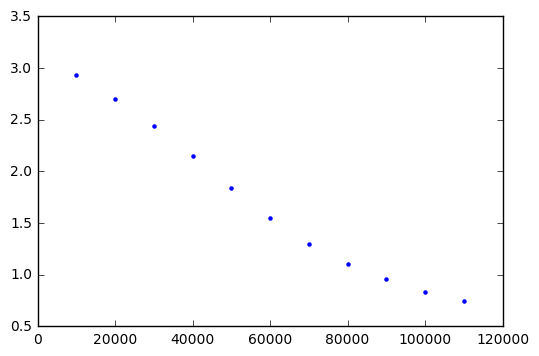

In [40]:
fig = plt.figure()
plt.scatter(Freq_61, Fase_61, color = 'blue', marker = '.')
#plt.errorbar(Freq_13, Fase_13, SPhi_13, fmt = '.')
#plt.axis([0, 0.002, 0, 3*10**-9])
plt.show()

In [41]:
x0 = [ 0.61, 59000]
def chi2(x,y,param,s):
    diff = np.array(y) - np.array(Amp(x, 4, param[0],param[1]))
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(Freq_61, Output_61, param, SO_61)

result = opt.minimize(chi2ftie,x0)
e61, w61= result.x
print(e61, w61)

v = len(Freq_61) - len([e61, w61])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([4,e61,w61]), v)
print(str(pwaarde*100)+"%")

0.7138787427280746 59580.07211807224
0.0%


In [42]:
Fe = lambda X: chi2(Freq_61, Output_61, [X, w61], SO_61) - chi2(Freq_61, Output_61, [e61, w61], SO_61) - 1
#print(Fe(0.733815))
e1 = opt.fsolve(Fe,0.65)[0]
e2 = opt.fsolve(Fe,0.85)[0]
#print(e61 - 0.694723, 0.733815 - e61)
print(e1,e61 ,e2)
sE1 = e61 - e1
sE2 = e2 - e61
print("Fout op e",sE1,sE2)
print("------")
Fw = lambda X: chi2(Freq_61, Output_61, [e61, X], SO_61) - chi2(Freq_61, Output_61, [e61, w61], SO_61) - 1
#print(Fw(60644.466))
w1 = opt.fsolve(Fw,55300)[0]
w2 = opt.fsolve(Fw,56000)[0]
#print(w61 - 58522.175, 60644.466 - w61)
print(w1,w61 ,w2)
sW1 = w61 - w1
sW2 = w2 - w61
print("Fout op w",sW1,sW2)

1.1887631924545072 0.7138787427280746 1.1902738309277063
Fout op e -0.4748844497264326 0.4763950881996317
------
55300.0 59580.07211807224 51824.66442810135
Fout op w 4280.072118072239 -7755.407689970889


/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


3.3196181237497178 -0.9999999375845174
0.6957503271698813


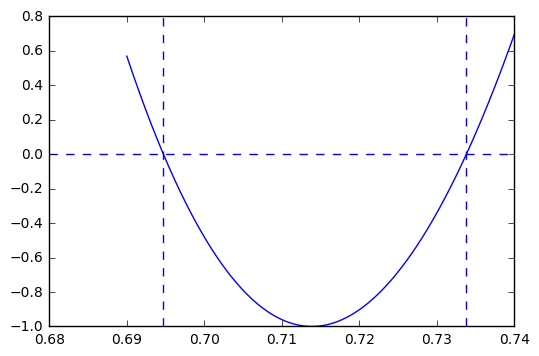

In [43]:
Fig = plt.figure()
Ax = np.linspace(0.69,0.74, 1000)
cita = chi2(Freq_61, Output_61, [e61, w61], SO_61)
chikwadraat = lambda X: chi2(Freq_61, Output_61, [X, w61], SO_61) - chi2(Freq_61, Output_61, [e61, w61], SO_61) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(0.694723, linestyle = '--')
plt.axvline(0.733815, linestyle = '--')
plt.show()

3.3196181237497178 -0.999999774327399
0.775651444170832


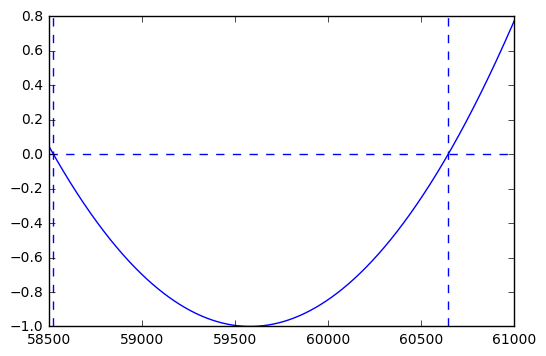

In [44]:
Fig = plt.figure()
Ax = np.linspace(58500,61000, 2000)
cita = chi2(Freq_61, Output_61, [e61, w61], SO_61)
chikwadraat = lambda X: chi2(Freq_61, Output_61, [e61, X], SO_61) - chi2(Freq_61, Output_61, [e61, w61], SO_61) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(58522.175, linestyle = '--')
plt.axvline(60644.466, linestyle = '--')
plt.show()

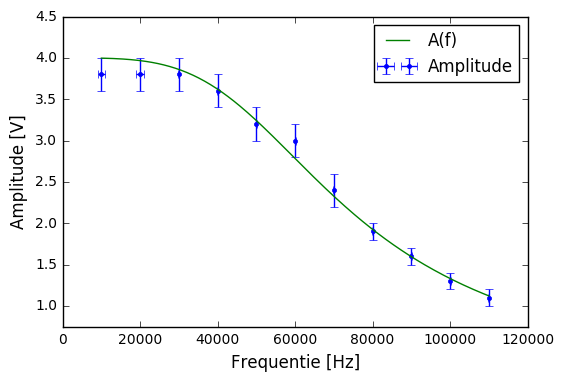

In [45]:
f_61 = np.linspace(min(Freq_61), max(Freq_61), 200)
fig = plt.figure()
plt.errorbar(Freq_61, Output_61, SO_61, SF_61, fmt = '.', label = "Amplitude")
plt.plot(f_61, Amplitude(f_61, 4, e61, w61), label =  "A(f)")
plt.xlabel("Frequentie [Hz]", fontsize = 12)
plt.ylabel("Amplitude [V]", fontsize = 12)
plt.legend()
plt.axis([0, 120000, 0.75, 4.5])
#fig.savefig('Opgave3-0.61-Amplitude_Plot.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [46]:
x0 = [ 0.61, 59000]
def chi2(x,y,param,s):
    diff = np.array(y) - np.array(FaseHoek(x, param[0],param[1]))
    return np.sum((diff/s)**2)
    
chi2ftie = lambda param: chi2(Freq_61, Fase_61, param, SPhi_61)

result = opt.minimize(chi2ftie,x0)
e61p, w61p= result.x
print(e61p, w61p)

v = len(Freq_61) - len([e61p, w61p])
pwaarde = 1 - stat.chi2.cdf(chi2ftie([e61p,w61p]), v)
print(str(pwaarde*100)+"%")

0.6123724302008439 59067.93946286484
100.0%


In [47]:
Fe = lambda X: chi2(Freq_61, Fase_61, [X, w61p], SPhi_61) - chi2(Freq_61, Fase_61, [e61p, w61p], SPhi_61) - 1
#print(Fe(0.634453))
e1 = opt.fsolve(Fe,0.585)[0]
e2 = opt.fsolve(Fe,0.64)[0]
#print(e61p - 0.591045, 0.634453 - e61p)
print(e1,e61p ,e2)
sE1 = e61p - e1
sE2 = e2 - e61p
print("Fout op e",sE1,sE2)
print("------")
Fw = lambda X: chi2(Freq_61, Fase_61, [e61p, X], SPhi_61) - chi2(Freq_61, Fase_61, [e61p, w61p], SPhi_61) - 1
#print(Fw(59867.12))
w1 = opt.fsolve(Fw,58000)[0]
w2 = opt.fsolve(Fw,60000)[0]
#print(w61p - 58277.24, 59867.12 - w61p)
print(w1,w61p ,w2)
sW1 = w61p - w1
sW2 = w2 - w61p
print("Fout op w",sW1,sW2)

8.536260496089087 0.6123724302008439 8.566714598262466
Fout op e -7.923888065888243 7.954342168061623
------
100908.7580617763 59067.93946286484 100873.49259780228
Fout op w -41840.818598911465 41805.55313493744


/Applications/anaconda/lib/python3.5/site-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


6.688466013904818e-14 -0.9999983646654568
0.5520247225745518


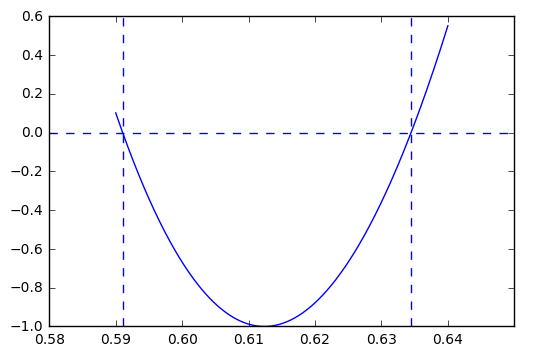

In [48]:
Fig = plt.figure()
Ax = np.linspace(0.59,0.64, 500)
cita = chi2(Freq_61, Fase_61, [e61p, w61p], SPhi_61)
chikwadraat = lambda X: chi2(Freq_61, Fase_61, [X, w61p], SPhi_61) - chi2(Freq_61, Fase_61, [e61p, w61p], SPhi_61) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(0.591045, linestyle = '--')
plt.axvline(0.634453, linestyle = '--')
plt.show()

6.688466013904818e-14 -0.9999987954067737
0.8310973147383882


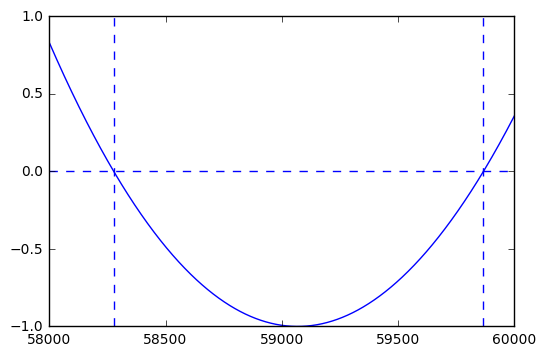

In [49]:
Fig = plt.figure()
Ax = np.linspace(58000,60000, 1000)
cita = chi2(Freq_61, Fase_61, [e61p, w61p], SPhi_61)
chikwadraat = lambda X: chi2(Freq_61, Fase_61, [e61p, X], SPhi_61) - chi2(Freq_61, Fase_61, [e61p, w61p], SPhi_61) - 1
Ay = np.array(list(map(chikwadraat,Ax)))
#Ay = np.array(list(map(chi2ftie,[Ax,w])))
print(cita, Ay.min())
print(Ay.max())
plt.plot(Ax, Ay)
plt.axhline(0, linestyle = '--')
plt.axvline(58277.24, linestyle = '--')
plt.axvline(59867.12, linestyle = '--')
plt.show()

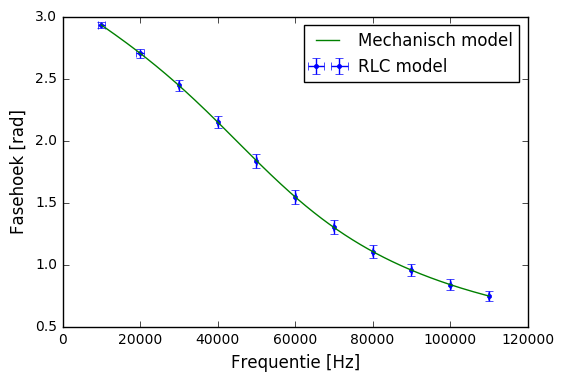

In [50]:
fig = plt.figure()
plt.errorbar(Freq_61, Fase_61, SPhi_61, SF_61, fmt = '.', label = "RLC model")
plt.plot(f_61, FaseHoek(f_61, e61p, w61p), label = "Mechanisch model")
plt.xlabel("Frequentie [Hz]", fontsize = 12)
plt.ylabel("Fasehoek [rad]", fontsize = 12)
plt.legend()
#fig.savefig('Opgave3-0.61-Fasehoek_Plot.jpg', dpi=400, bbox_inches='tight')
plt.show()

In [51]:
print(len(f_13), len(f_6),len(f_61))

200 200 200


In [52]:
f13 = np.linspace(0, 4*w13, 200)
f6 = np.linspace(0, 4*w6, 200)
f61 = np.linspace(0, 4*w61, 200)

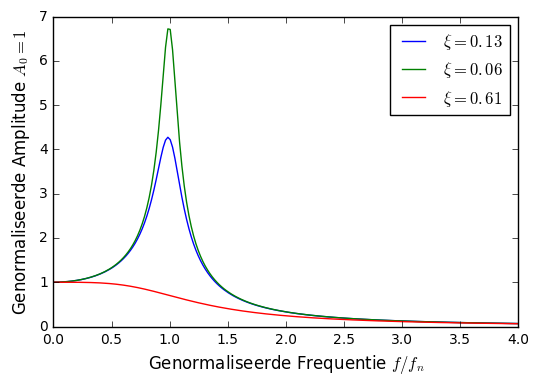

In [53]:
fig = plt.figure()
#plt.errorbar(Freq_13, Output_13, SO_13, SF_13, fmt = '.', label = 'Amplitude')
plt.plot(f13/w13, Amplitude(f13, 1, e13, w13), label = r"$\xi = 0.13$")
#plt.errorbar(Freq_6, Output_6, SO_6, SF_6, fmt = '.')
plt.plot(f6/w6, Amplitude(f6, 1, e6, w6), label = r"$\xi = 0.06$")
#plt.errorbar(Freq_61, Output_61, SO_61, SF_61, fmt = '.')
plt.plot(f61/w61, Amplitude(f61, 1, e61, w61), label = r"$\xi = 0.61$")
#plt.axis([0, 120000, 0, 30])
plt.legend()
plt.xlabel("Genormaliseerde Frequentie $f/f_n$", fontsize = 12)
plt.ylabel("Genormaliseerde Amplitude $A_0 = 1$", fontsize = 12)
#fig.savefig('Opgave3-Genormaliseerde_Amplitude_Plot.jpg', dpi=400, bbox_inches='tight')
plt.show()

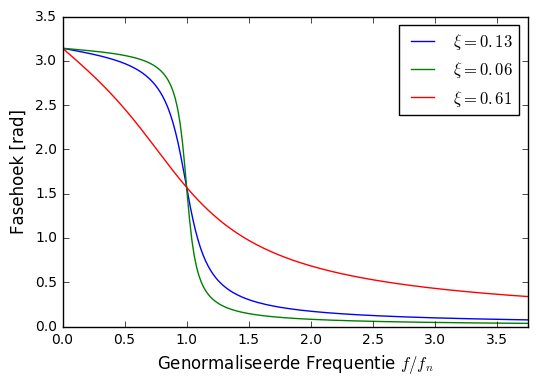

In [54]:
fig = plt.figure()
#plt.errorbar(Freq_13, Fase_13, SPhi_13, SF_13, fmt = '.', label = 'RC model')
plt.plot(f13/w13p, FaseHoek(f13, e13p, w13p), label = r"$\xi = 0.13$")
#plt.errorbar(Freq_6, Fase_6, SPhi_6, SF_6, fmt = '.')
plt.plot(f6/w6p, FaseHoek(f6, e6p, w6p), label = r"$\xi = 0.06$")
#plt.errorbar(Freq_61, Fase_61, SPhi_61, SF_61, fmt = '.')
plt.plot(f61/w61p, FaseHoek(f61, e61p, w61p), label = r"$\xi = 0.61$")
plt.legend()
plt.xlabel("Genormaliseerde Frequentie $f/f_n$", fontsize = 12)
plt.ylabel("Fasehoek [rad]", fontsize = 12)
plt.axis([0, 3.75, 0, 3.5])
#fig.savefig('Opgave3-Genormaliseerde_Fasehoek_Plot.jpg', dpi=400, bbox_inches='tight')
plt.show()